In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

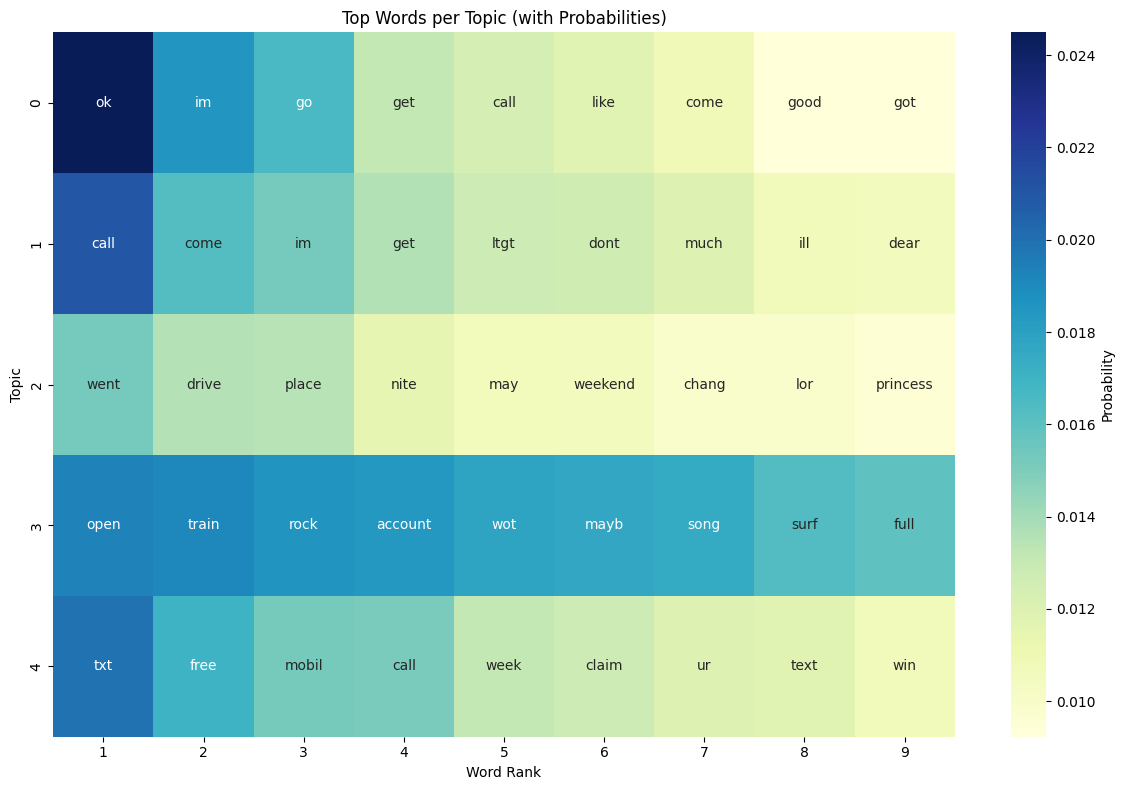

In [3]:
# Load the CSV
df = pd.read_csv("run_20250523_094552/complete_results/topic_words.csv")

# Convert types if needed
df["topic"] = df["topic"].astype(int)
df["rank"] = df["rank"].astype(int)
df["probability"] = df["probability"].astype(float)

# -------- HEATMAP OF TOP WORDS --------
top_n = 10  # top N words per topic
df_top = df[df["rank"] < top_n]

# Create pivot tables
pivot_words = df_top.pivot(index="topic", columns="rank", values="word")
pivot_probs = df_top.pivot(index="topic", columns="rank", values="probability")

# Plot heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_probs,
    annot=pivot_words,
    fmt="",
    cmap="YlGnBu",
    cbar_kws={"label": "Probability"},
)
plt.title("Top Words per Topic (with Probabilities)")
plt.xlabel("Word Rank")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

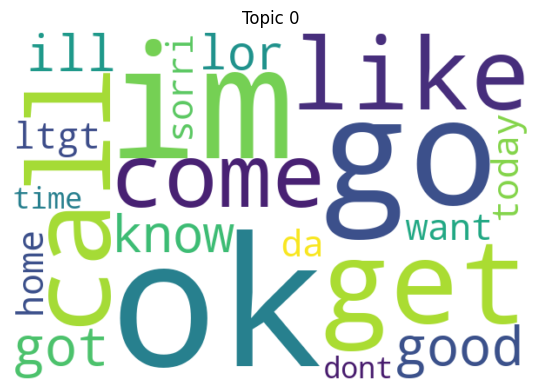

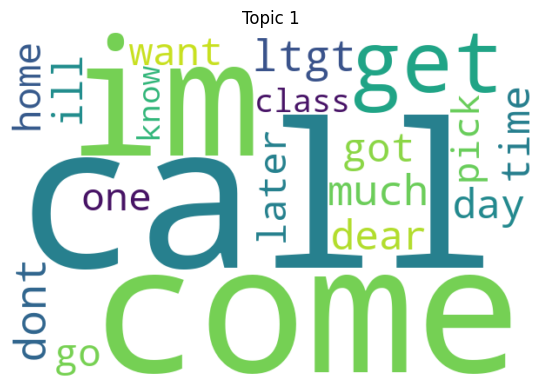

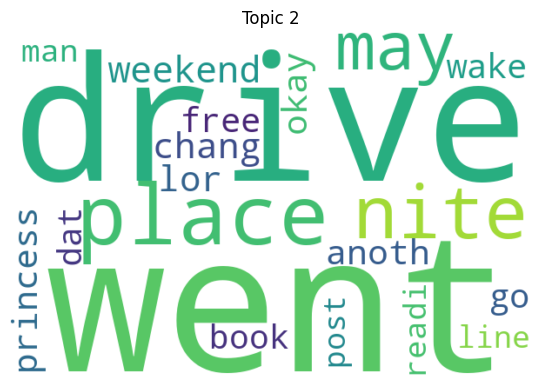

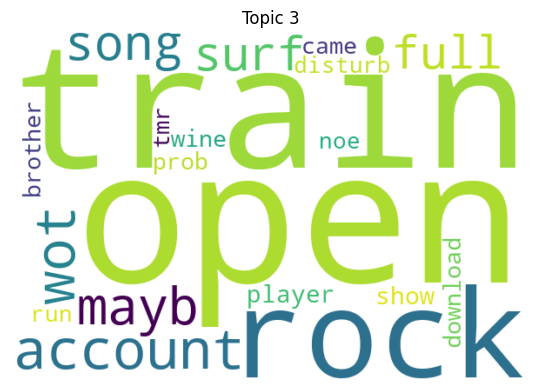

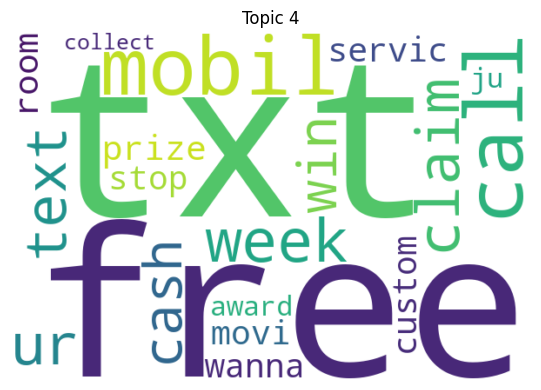

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each topic
for topic_id in df["topic"].unique():
    topic_words = df[df["topic"] == topic_id]
    word_freq = dict(zip(topic_words["word"], topic_words["probability"]))

    wc = WordCloud(
        width=600, height=400, background_color="white"
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_id}")
    plt.tight_layout()
    plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Assume doc_topic_matrix is of shape [num_docs, num_topics]
# Example: doc_topic_matrix = lda_model.transform(vectorized_data)

dominant_topic = np.argmax(doc_topic_matrix, axis=1)
topic_entropy = entropy(doc_topic_matrix.T)  # per document

# Plot histogram of dominant topics
plt.figure(figsize=(8, 4))
plt.hist(
    dominant_topic, bins=np.arange(doc_topic_matrix.shape[1] + 1) - 0.5, rwidth=0.8
)
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Documents")
plt.title("Topic Dominance per Document")
plt.show()

# Plot entropy distribution
plt.figure(figsize=(8, 4))
plt.hist(topic_entropy, bins=30)
plt.xlabel("Entropy")
plt.ylabel("Number of Documents")
plt.title("Topic Distribution Entropy per Document")
plt.show()

NameError: name 'doc_topic_matrix' is not defined